In [1]:
import pandas as pd, matplotlib.pyplot as plt, time
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

# Define a database name
# Set your postgres username
dbname = 'postgres'
username = 'whitneyreiner' # change this to your username


## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://whitneyreiner@localhost/postgres


In [2]:
con = None
con = psycopg2.connect(database = dbname, user = username)
query= "SELECT * FROM parking_db;"
tickets = pd.read_sql_query(query,con)
tickets

,cluster,weekdayindex,day,hour,time,violationdescription,percent,globalpercent,result,lat_min,long_min,lat_max,long_max
0,5796,6,Sunday,3,3:00 A,NO PARK/STREET CLEAN,0.250000,0.727273,0.34,34.043129,-118.253921,34.043269,-118.253703
1,4851,4,Friday,11,11:00,METER EXP.,0.052632,0.150233,0.35,34.099761,-118.332467,34.099761,-118.332467
2,4851,4,Friday,12,12:00,METER EXP.,0.052632,0.130154,0.40,34.099761,-118.332467,34.099761,-118.332467
3,1048,2,Wednesday,8,8:00 A,NO PARK/STREET CLEAN,0.125000,0.302407,0.41,34.000082,-118.433543,34.002714,-118.431181
4,1802,3,Thursday,8,8:00 A,NO PARK/STREET CLEAN,0.125000,0.301252,0.41,34.209346,-118.378013,34.215013,-118.370325
5,2556,2,Wednesday,12,12:00,METER EXP.,0.052632,0.128942,0.41,34.147865,-118.378977,34.147865,-118.378977
6,4055,0,Monday,12,12:00,NO PARK/STREET CLEAN,0.100000,0.242646,0.41,34.068889,-118.345123,34.068889,-118.345123
7,6110,2,Wednesday,8,8:00 A,NO PARK/STREET CLEAN,0.125000,0.302407,0.41,34.056519,-118.307923,34.057704,-118.307817
8,2556,3,Thursday,12,12:00,METER EXP.,0.050000,0.120325,0.42,34.147865,-118.378977,34.147865,-118.378977
9,638,3,Thursday,11,11:00,METER EXP.,0.066667,0.139026,0.48,34.065238,-118.469281,34.065238,-118.469281


In [3]:
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [4]:
ticketstrainsample=tickets.sample(1000)

In [5]:
ticketstrainsample.to_csv("trainSampleforValidation.csv", encoding="utf-8", index =False)

In [200]:
#FROM INDEX.py
#def cluster_id(lat,long, uday):
    #user_input_coords 
    #u_lat=str(lat)
    #u_lon=str(long)
    #u_day=str(uday)
    #app_user_query = "SELECT * FROM parking_db WHERE lat_max >= '"+ u_lat +"'AND lat_min <='"+ u_lat +"'AND long_min <='"+ u_lon +"' AND long_max >='" + u_lon +"'AND day ='" + u_day +"';"
    #user_SUBSET = pd.read_sql_query(app_user_query,con)
    #return user_SUBSET
#returns cluster info.

day_select=user_SUBSET[user_SUBSET['day'].str.contains("Friday")==True]
day_specifics=day_select[['hour','time', 'violationdescription', 'result']]
day_specifics




,hour,time,violationdescription,result
0,10,10:00,NO PARK/STREET CLEAN,1.90
2,11,11:00,NO PARK/STREET CLEAN,7.84
3,10,10:00,DISPLAY OF PLATES,8.50
5,19,7:00 P,STANDNG IN ALLEY,21.78


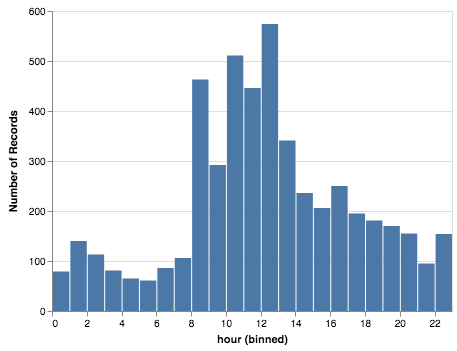

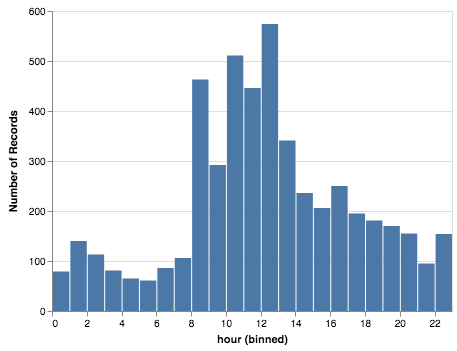

In [28]:
#tickets2=tickets.head(5000)
#alt.Chart(tickets2).mark_circle(size=60).encode(
 #   x='hour',
 #   y='day',
 #   color='hour',
 #   tooltip=['day', 'time', 'violationdescription', ]
#).interactive()

tickets2= tickets.sample(5000)


alt.Chart(tickets2).mark_bar().encode(
    alt.X("hour", bin= alt.Bin(maxbins=25)),
    y='count()',
)